# AWS X-Ray API Demo

#### 1. Import your fetch function

In [1]:
from utils.fetch_xray_trace_data import fetch_today_trace_data

#### 2. Fetch traces from AWS X-Ray

In [2]:
df = fetch_today_trace_data()
print(f"✅ Fetched {len(df)} traces")

✅ Fetched 813 traces


#### 3. Inspect sample

In [3]:
df.head()

,trace_id,timestamp,flag,price_usd,processing_time_ms,shard_id,error,hour_str,data_volume_bytes
767,1-68280efe-ed264b3bf757bcfbb0278cec,2025-05-17 04:22:24.103085,⚠️ High Price,90644.95,464.99,bitcoin,False,2024-11-18 06:00:00,157.0
575,1-68283105-835fcc1f476ff1f977ec0f51,2025-05-17 06:47:34.327014,⚠️ High Price,91746.11,400.46,bitcoin,False,2024-11-18 08:00:00,158.0
460,1-6828333d-3310cfaa21b3a2227d13a4a6,2025-05-17 06:57:01.706086,⚠️ High Price,91919.59,59.97,bitcoin,False,2024-11-18 10:00:00,158.0
475,1-68283109-bdea8fbe64d5341be55223b6,2025-05-17 06:47:37.343733,⚠️ High Price,90755.98,69.91,bitcoin,False,2024-11-18 20:00:00,158.0
253,1-68290533-0141a4264d3ca3dc26dadb0d,2025-05-17 21:52:52.908798,⚠️ High Price,91350.10,469.11,bitcoin,False,2024-11-18 22:00:00,158.0


#### 4. Group by flags or error rates (example use)

In [4]:
df["flag"].value_counts()


flag
⚠️ High Price             645
🚨 Extremely High Price    168
Name: count, dtype: int64

<Axes: xlabel='hour_str'>

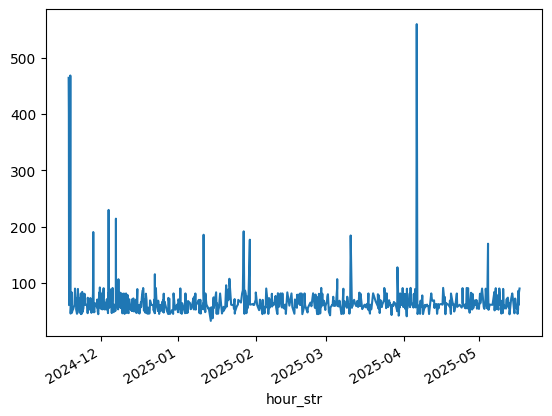

In [5]:
df.groupby("hour_str")["processing_time_ms"].mean().plot()